In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [78]:
df = pd.read_csv('../Clase_2022_06_07/titanic.csv')[['Fare','Sex','Age','Embarked','Pclass']]


In [79]:
df.isnull().mean()


Fare        0.000000
Sex         0.000000
Age         0.198653
Embarked    0.002245
Pclass      0.000000
dtype: float64

In [80]:
# Al modelo le complica tener nulos, así que reemplazaremos en las columnas que tienen, usando medidas de tendencia central
df['Age'] = df.Age.fillna(df.Age.mean())
df['Embarked'] = df.Embarked.fillna(df.Embarked.mode()[0])
df.dtypes


Fare        float64
Sex          object
Age         float64
Embarked     object
Pclass        int64
dtype: object

In [81]:
df.isnull().mean()

Fare        0.0
Sex         0.0
Age         0.0
Embarked    0.0
Pclass      0.0
dtype: float64

In [82]:
X = df.drop(columns = 'Fare')
y = df.Fare
X

,Sex,Age,Embarked,Pclass
0,male,22.000000,S,3
1,female,38.000000,C,1
2,female,26.000000,S,3
3,female,35.000000,S,1
4,male,35.000000,S,3
...,...,...,...,...
886,male,27.000000,S,2
887,female,19.000000,S,1
888,female,29.699118,S,3
889,male,26.000000,C,1


2 tipos de Objetos:

* Estimadores: Modelos: LinearRegression, LogisticRegression.
* Transformadores: Transformaciones a la data...

Estimadores: siempre tienen un metodo fit (entrenar el modelo), predict (predecir una prediccion) y score (calcular el error).  
Transformers: metodos: fit, transform, fit_transform.

In [83]:
from sklearn.preprocessing import OrdinalEncoder
## S, C, Q... -> 0, 1, 2 (a las variables categoricas strings los convierte en numeros)
## Ventaja: Es un proceso barato
## Desventaja: el modelo puede asumir un orden.

ord = OrdinalEncoder()
ord.fit_transform(X) # devuelve un np.array, no muy agradable


array([[ 1., 28.,  2.,  2.],
       [ 0., 52.,  0.,  0.],
       [ 0., 34.,  2.,  2.],
       ...,
       [ 0., 39.,  2.,  2.],
       [ 1., 34.,  0.,  0.],
       [ 1., 43.,  1.,  2.]])

In [84]:
from feature_engine.encoding import OrdinalEncoder
ord = OrdinalEncoder(encoding_method = 'arbitrary')
x_enc = ord.fit_transform(X) 
X_enc = sm.add_constant(x_enc)
X_enc


,const,Sex,Age,Embarked,Pclass
0,1.0,0,22.000000,0,3
1,1.0,1,38.000000,1,1
2,1.0,1,26.000000,0,3
3,1.0,1,35.000000,0,1
4,1.0,0,35.000000,0,3
...,...,...,...,...,...
886,1.0,0,27.000000,0,2
887,1.0,1,19.000000,0,1
888,1.0,1,29.699118,0,3
889,1.0,0,26.000000,1,1


In [85]:
model_enc = sm.OLS(y, X_enc).fit()
model_enc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     107.6
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.00e-74
Time:                        19:43:22   Log-Likelihood:                -4567.5
No. Observations:                 891   AIC:                             9145.
Df Residuals:                     886   BIC:                             9169.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.3632      6.522     17.689      0.000     102.563     128.163
Sex            9.3789      2.942      3.187      0.001       3.604      15.154
Age           -0.3467      0.113     -3.073      0.002      -0.568      -0.125
Embarked       6.1296      2.176      2.817      0.005       1.860      10.399
Pclass       -33.9525      1.767    -19.219      0.000     -37.420     -30.485
==============================================================================
Omnibus:                      980.555   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            81382.161
Skew:                           5.242   Prob(JB):                         0.00
Kurtosis:                      48.631   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
X

,Sex,Age,Embarked,Pclass
0,male,22.000000,S,3
1,female,38.000000,C,1
2,female,26.000000,S,3
3,female,35.000000,S,1
4,male,35.000000,S,3
...,...,...,...,...
886,male,27.000000,S,2
887,female,19.000000,S,1
888,female,29.699118,S,3
889,male,26.000000,C,1


In [87]:
pd.get_dummies(X) # esuna buena función pero no debería usarse para modelar.

,Age,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,3,0,1,0,0,1
1,38.000000,1,1,0,1,0,0
2,26.000000,3,1,0,0,0,1
3,35.000000,1,1,0,0,0,1
4,35.000000,3,0,1,0,0,1
...,...,...,...,...,...,...,...
886,27.000000,2,0,1,0,0,1
887,19.000000,1,1,0,0,0,1
888,29.699118,3,1,0,0,0,1
889,26.000000,1,0,1,1,0,0


In [88]:
pd.get_dummies(X).corr()

,Age,Pclass,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Age,1.000000,-0.331339,-0.084153,0.084153,0.032024,-0.013855,-0.019336
Pclass,-0.331339,1.000000,-0.131900,0.131900,-0.243292,0.221009,0.074053
Sex_female,-0.084153,-0.131900,1.000000,-1.000000,0.082853,0.074115,-0.119224
Sex_male,0.084153,0.131900,-1.000000,1.000000,-0.082853,-0.074115,0.119224
Embarked_C,0.032024,-0.243292,0.082853,-0.082853,1.000000,-0.148258,-0.782742
Embarked_Q,-0.013855,0.221009,0.074115,-0.074115,-0.148258,1.000000,-0.499421
Embarked_S,-0.019336,0.074053,-0.119224,0.119224,-0.782742,-0.499421,1.000000


In [89]:
from feature_engine.encoding import OneHotEncoder
ohe = OneHotEncoder(drop_last = False)
x_ohe = ohe.fit_transform(X)
X_ohe = sm.add_constant(x_ohe)
model_ohe = sm.OLS(y, X_ohe).fit()
model_ohe.summary()
# Datos que mirar:
# Cond No (Alto significa que es alta multi colinealidad)
# AIC y BIC ojala más altos que otro modelo (se usa relativamente a otro modelo)
# R-squared parametro de ajuste
# P > |t| -> significa que es una variable importante (significancia de variable)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     90.40
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           7.09e-77
Time:                        19:43:22   Log-Likelihood:                -4560.1
No. Observations:                 891   AIC:                             9132.
Df Residuals:                     885   BIC:                             9161.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.0559      3.616     17.990      0.000      57.959      72.153
Age           -0.3125      0.112     -2.784      0.005      -0.533      -0.092
Pclass       -31.7444      1.844    -17.218      0.000     -35.363     -28.126
Sex_male      27.7066      2.485     11.148      0.000      22.829      32.584
Sex_female    37.3493      2.151     17.365      0.000      33.128      41.571
Embarked_S    15.1513      2.194      6.906      0.000      10.845      19.457
Embarked_C    32.4525      2.721     11.926      0.000      27.112      37.793
Embarked_Q    17.4521      4.053      4.306      0.000       9.497      25.407
==============================================================================
Omnibus:                      968.380   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76722.751
Skew:                           5.146   Prob(JB):                         0.00
Kurtosis:                      47.279   Cond. No.                     4.88e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.96e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [99]:
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
## Preprocesamiento...
ohe = OneHotEncoder(drop_last = True)
X_ohe = ohe.fit_transform(X) # Transformar variables categorias a columnas de 1's

sc = SklearnTransformerWrapper(StandardScaler(), variables=['Age'])  # estandarizar los datos
X_sc = sm.add_constant(sc.fit_transform(X_ohe) )

model_sc_ohe = sm.OLS(y, X_sc).fit()
model_sc_ohe.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     90.40
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           7.09e-77
Time:                        19:53:06   Log-Likelihood:                -4560.1
No. Observations:                 891   AIC:                             9132.
Df Residuals:                     885   BIC:                             9161.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.5750      7.027     15.735      0.000      96.783     124.367
Age           -4.0614      1.459     -2.784      0.005      -6.925      -1.198
Pclass       -31.7444      1.844    -17.218      0.000     -35.363     -28.126
Sex_male      -9.6426      2.920     -3.302      0.001     -15.374      -3.911
Embarked_S    -2.3007      5.028     -0.458      0.647     -12.169       7.567
Embarked_C    15.0005      5.879      2.552      0.011       3.462      26.539
==============================================================================
Omnibus:                      968.380   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            76722.751
Skew:                           5.146   Prob(JB):                         0.00
Kurtosis:                      47.279   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

PAGINA DE STATSMODELS:

[Link](https://www.statsmodels.org/stable/index.html)

## Modelamiento desde el ML

In [110]:
df = pd.read_csv('../Clase_2022_07_07/mtcars.csv',index_col=0)
df.head()
X= df.drop(columns = 'mpg')
y = df.mpg

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lr = LinearRegression()
lr.fit(X, y)
y_pred = lr.predict(X)

print('R2: ', r2_score(y, y_pred)) # nivel de ajuste
print('RMSE: ', mean_squared_error(y, y_pred, squared=False)) # error promedio

R2:  0.8690157644777647
RMSE:  2.146904967160943


In [116]:
X

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Merc 280,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [136]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Holdout: Seleccionar base de train y de test.
# Cross-Validation:
# K-fold: Separo el dataset en k partes y hago k-1 veces train y test.
lr = LinearRegression() # fit_intercept = False -> no se ajusta el intercepto

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

print('R2: ', r2_score(y_test, y_pred)) # nivel de ajuste
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False)) # error promedio

R2:  0.7466453084791007
RMSE:  3.182790390174519


In [137]:
pd.Series(lr.coef_,index = X.columns)

cyl    -0.476250
disp    0.018311
hp     -0.009500
drat    1.002130
wt     -4.862037
qsec    1.840952
vs     -1.937186
am      1.076624
gear    1.327108
carb    0.147131
dtype: float64

In [139]:
lr.intercept_ # atributos que terminan con _ son atributos que solo están disponibles depsués de haberse entrenado el modelo

-5.593700289851515

In [140]:
## Sacar columnas, aunque sean no signfificativas, raramente mejoran el modelo. 

In [142]:
df = pd.read_csv('../Clase_2022_06_07/titanic.csv')[['Fare','Sex','Age','Embarked','Pclass']]
df.isnull().mean()
# Al modelo le complica tener nulos, así que reemplazaremos en las columnas que tienen, usando medidas de tendencia central
df['Age'] = df.Age.fillna(df.Age.mean())
df['Embarked'] = df.Embarked.fillna(df.Embarked.mode()[0])

X = df.drop(columns='Fare')
y = df.Fare

In [153]:
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.metrics import mean_absolute_error
set_config(display='diagram')

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
sc = SklearnTransformerWrapper(StandardScaler(), variables=['Age']) 
pipe = Pipeline(steps = [
                        ('ohe',OneHotEncoder()),
                        ('sc',sc),
                        ('lr',LinearRegression())
                        ])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('R2: '  , r2_score(y_test, y_pred)) # nivel de ajuste
print('RMSE: ', mean_squared_error(y_test, y_pred, squared=False)) # error promedio
print('MAE: ', mean_absolute_error(y_test, y_pred)) # error absoluto promedio


R2:  0.3510546175081378
RMSE:  31.68907234775168
MAE:  21.021145833782644


<AxesSubplot:ylabel='Frequency'>

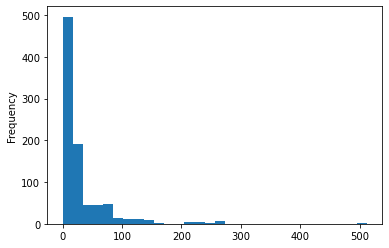

In [156]:
y.plot(kind='hist', bins=30)